In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("athlete_events.csv")

In [15]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#Se filtran los datos de Mexico
data_Mexico = data[data["NOC"] == "MEX"]
data_Mexico.head()


In [16]:
#Se aplica un conteo
data_Mexico.count()


ID        2880
Name      2880
Sex       2880
Age       2675
Height    2435
Weight    2314
Team      2880
NOC       2880
Games     2880
Year      2880
Season    2880
City      2880
Sport     2880
Event     2880
Medal      110
dtype: int64

In [17]:
#Se hace una limpieza para descartar los valores que no cuentan con medallas
Mexico = data_Mexico.dropna(subset=["Medal"])

In [22]:
#Se acomodan los valores por año en forma ascendente
Mexico = Mexico.sort_values(by="Year")
#print(Mexico)


In [55]:
#Se importa un documento que contiene datos faltantes del documento original
datos_actualizados = pd.read_excel("Mexico_actualizado.xlsx")

#Se agrupan y contabilizan las medallas por año
meda_año = datos_actualizados.groupby("Year")["Medal"].count().reset_index()



   Sex   Age  NOC  Year         City       Sport   Medal
0    M  38.0  MEX  1900        Paris        Polo  Bronze
1    M  20.0  MEX  1932  Los Angeles      Boxing  Silver
2    M  19.0  MEX  1932  Los Angeles    Shooting  Silver
3    M  23.0  MEX  1936       Berlin  Basketball  Bronze
4    M  27.0  MEX  1936       Berlin      Boxing  Bronze
..  ..   ...  ...   ...          ...         ...     ...
75   F   NaN  MEX  2024        Paris     Archery  Bronze
76   F   NaN  MEX  2024        Paris        Judo  Silver
77   M   NaN  MEX  2024        Paris      Diving  Silver
78   M   NaN  MEX  2024        Paris      Diving  Bronze
79   v   NaN  MEX  2024        Paris      Boxing  Silver

[80 rows x 7 columns]


    Year  Medal
0   1900      1
1   1932      2
2   1936      3
3   1948      5
4   1952      1
5   1956      2
6   1960      1
7   1964      1
8   1968      9
9   1972      2
10  1976      3
11  1980      4
12  1984      6
13  1988      2
14  1992      1
15  1996      1
16  2000      6
17  2004      4
18  2008      4
19  2012      8
20  2016      5
21  2020      4
22  2024      5


(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

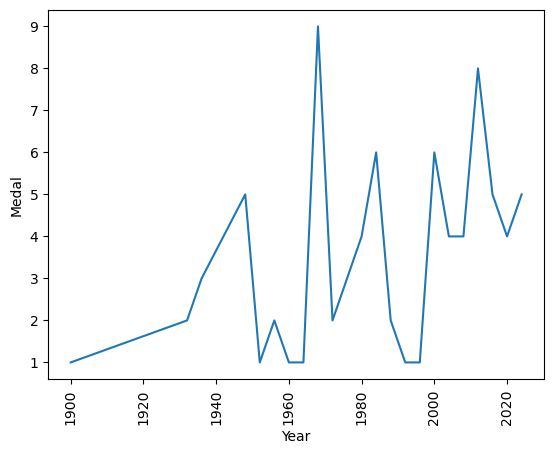

In [53]:
print(meda_año)
#Realizamos una gráfica de lineas para visualizar la evolución que se ha experimentado
sns.lineplot (data=meda_año, x="Year",y="Medal")
plt.xticks(rotation=90)
             

In [56]:
#Agrupamos y contabilizamos las medallas por deporte
depor_año =datos_actualizados.groupby("Sport")["Medal"].count().reset_index()
depor_año.to_excel("Deporte.xlsx", index=False)
print(depor_año)
df_sorted = depor_año.sort_values(by='Medal', ascending=False)

                Sport  Medal
0             Archery      4
1           Athletics     12
2          Basketball      1
3              Boxing     15
4             Cycling      2
5              Diving     18
6       Equestrianism      7
7             Fencing      1
8            Football      2
9                Judo      1
10  Modern Pentathlon      1
11               Polo      2
12           Shooting      1
13           Swimming      2
14          Taekwondo      7
15      Weightlifting      3
16          Wrestling      1


([<matplotlib.axis.YTick at 0x1f74d4145b0>,
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9'),
  Text(0, 10.0, '10'),
  Text(0, 11.0, '11'),
  Text(0, 12.0, '12'),
  Text(0, 13.0, '13'),
  Text(0, 14.0, '14'),
  Text(0, 15.0, '15'),
  Text(0, 16.0, '16'),
  Text(0, 17.0, '17'),
  Text(0, 18.0, '18'),
  Text(0, 19.0, '19')])

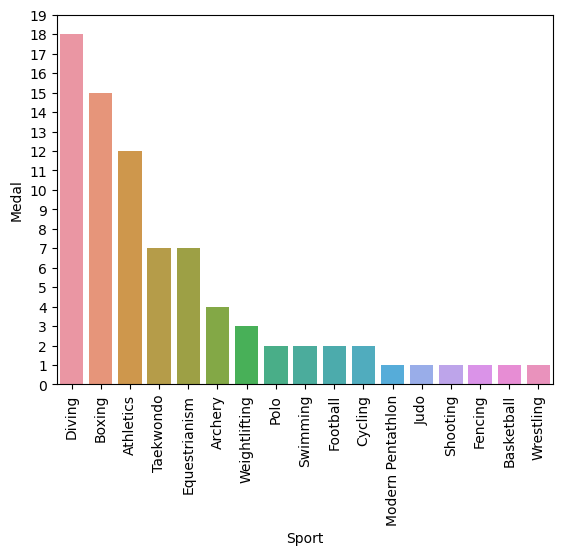

In [43]:
#Realizamos una gráfica de barras
sns.barplot(data=df_sorted, x="Sport", y="Medal")
plt.xticks(rotation=90)
y_min, y_max = plt.ylim()

# Configurar los ticks del eje y para que incrementen en 1
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 1))